In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Setup

In [2]:
# Load annotation (S-phase label & clone)
df = pd.read_csv('../annotation/annotation_u2os/nuclei_u2os_sphase_CY5_all.tsv', sep='\t')
dfSubset = pd.read_csv('../annotation/annotation_u2os/nuclei_u2os_sphase_subset.tsv', sep='\t').set_index('original_index')

timepoints = ['0h', '12h', '24h', '48h', '96h']
timepoints_arr = np.array(df['timepoint'])

# Set general plotting parameters
legend_labl = ['0h', '12h', '24h', '48h', '96h']
xlabl, ylabl = 'PC1', 'PC2'
s = 10; alpha_kde = 1; alpha_scatter = 0.3; markerscale = 1.5                

## DAPI/EdU
- KDE plots
- Scatter plots

In [3]:
# Load DAPI/EdU embeddings and center
embeddings_arr = np.load('embeddings/embeddings_BYOL_u2os_CY5_all.npy', allow_pickle=True)
scaler = StandardScaler(with_mean=True, with_std=False)
X_centered = scaler.fit_transform(embeddings_arr)

# Run PCA
pca = PCA(n_components=2, random_state=42)
X_emb = pca.fit_transform(X_centered)

# Plotting parameters
xlim_left_k, xlim_right_k, ylim_down_k, ylim_up_k = -50, 400, -30, 25                # KDE
xlim_left_s, xlim_right_s, ylim_down_s, ylim_up_s = -50, 600, -30, 50                # Scatter
vline_x, hline_y = 100, 0  

### KDE plots

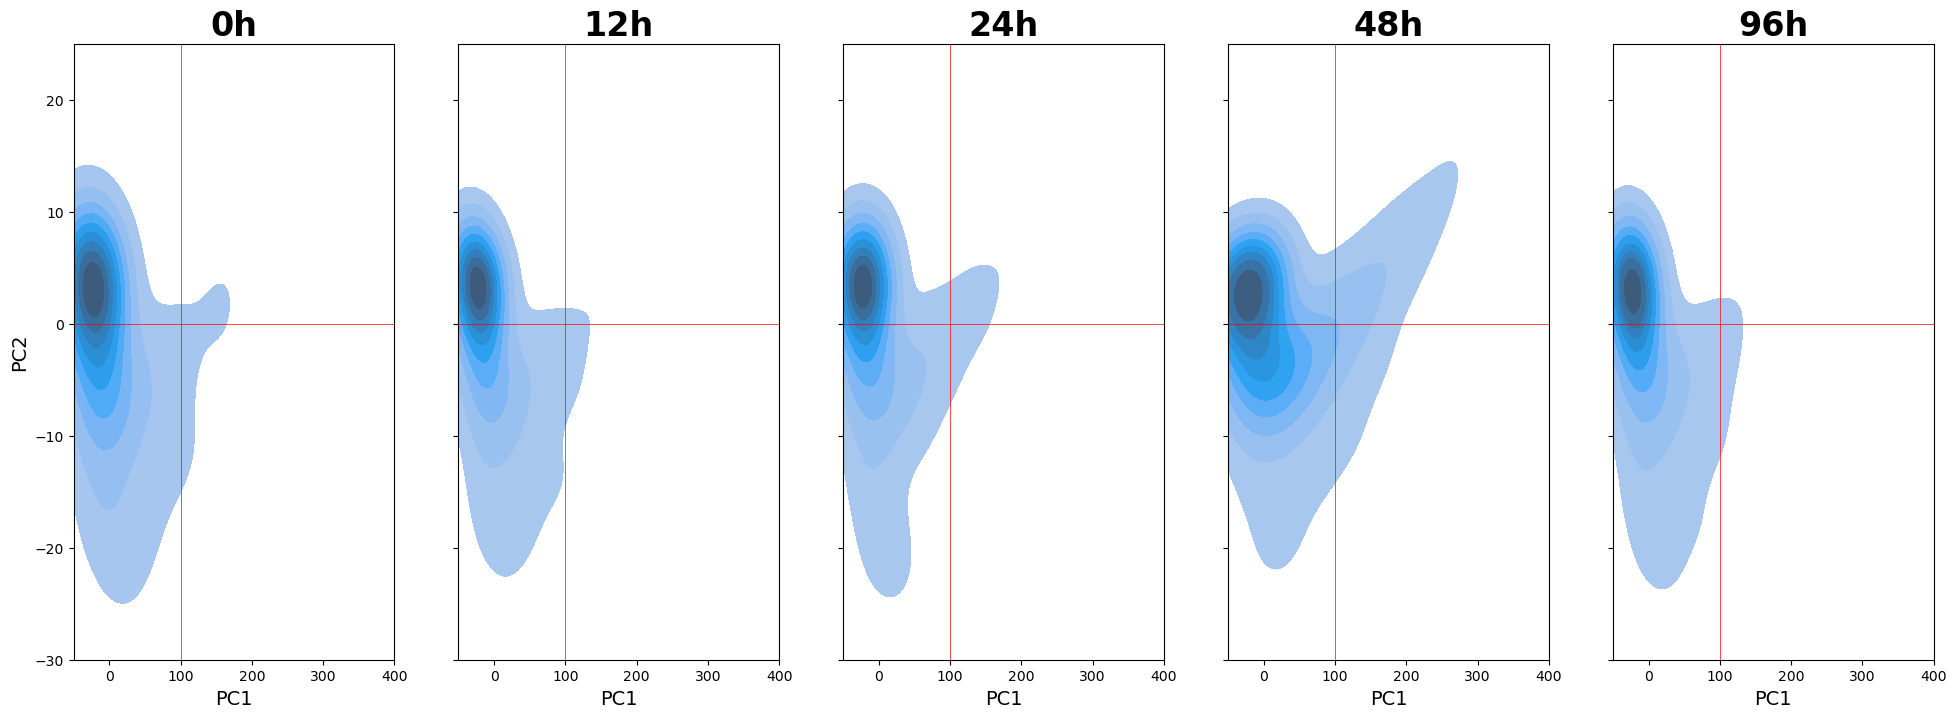

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(24, 8), sharex=True, sharey=True)    

for ax, timepoint in zip(axes.flatten(), timepoints):

    # Subset embedding by timepoint
    indices1 = df.loc[df['timepoint'] == timepoint].index
    X_emb1 = X_emb[indices1]
              
    # KDE plots
    data = pd.DataFrame(X_emb1, columns=['x','y'])
    g = sns.kdeplot(data=data, x='x', y='y', bw_adjust=2, levels=10, thresh=0.05, alpha=alpha_kde, fill=True, ax=ax)

    ax.set_title(timepoint, fontsize=24, fontweight='bold')
    ax.set_xlabel(xlabl, fontsize=14); ax.set_ylabel(ylabl, fontsize=14)
    ax.set_xlim(xlim_left_k, xlim_right_k); ax.set_ylim(ylim_down_k, ylim_up_k)
    ax.axhline(y = hline_y, color = 'red', linestyle = '-', linewidth = 0.5)
    ax.axvline(x = vline_x, color = 'red', linestyle = '-', linewidth = 0.5)

### Scatter plots

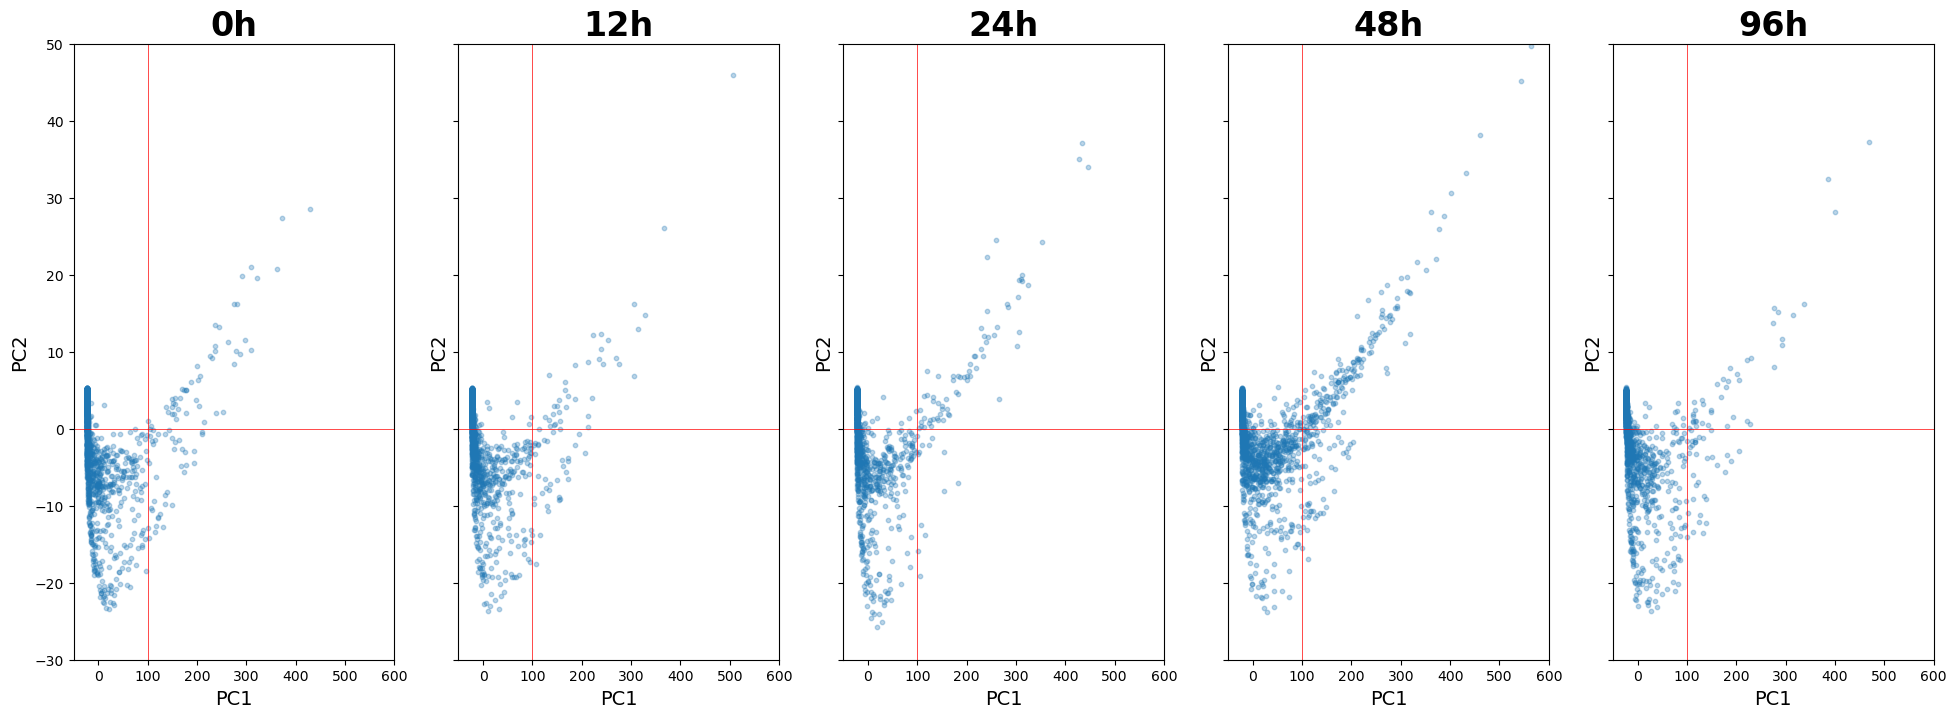

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(24, 8), sharex=True, sharey=True)     

for ax, timepoint in zip(axes.flatten(), timepoints):

    # Subset embedding by timepoint (use subset)  
    indices1 = dfSubset.loc[dfSubset['timepoint'] == timepoint].index
    X_emb1 = X_emb[indices1]
    
    # Scatter plots        
    ax.scatter(X_emb1[:, 0], X_emb1[:, 1], cmap='Spectral', s=s, alpha=alpha_scatter)

    ax.set_title(timepoint, fontsize=24, fontweight='bold')
    ax.set_xlabel(xlabl, fontsize=14); ax.set_ylabel(ylabl, fontsize=14)
    ax.set_xlim(xlim_left_s, xlim_right_s); ax.set_ylim(ylim_down_s, ylim_up_s)
    ax.axhline(y = hline_y, color = 'red', linestyle = '-', linewidth = 0.5)
    ax.axvline(x = vline_x, color = 'red', linestyle = '-', linewidth = 0.5)

## DAPI/PCNA
- KDE plots
- Scatter plots

In [6]:
# Load DAPI/PCNA embeddings and center
embeddings_arr = np.load('embeddings/embeddings_BYOL_u2os_FITC_all.npy', allow_pickle=True)
scaler = StandardScaler(with_mean=True, with_std=False)
X_centered = scaler.fit_transform(embeddings_arr)

# Run PCA
pca = PCA(n_components=2, random_state=42)
X_emb = pca.fit_transform(X_centered)

# Plotting parameters
xlim_left, xlim_right, ylim_down, ylim_up = -50, 500, -30, 50                
vline_x, hline_y = 200, 25     

### KDE plots

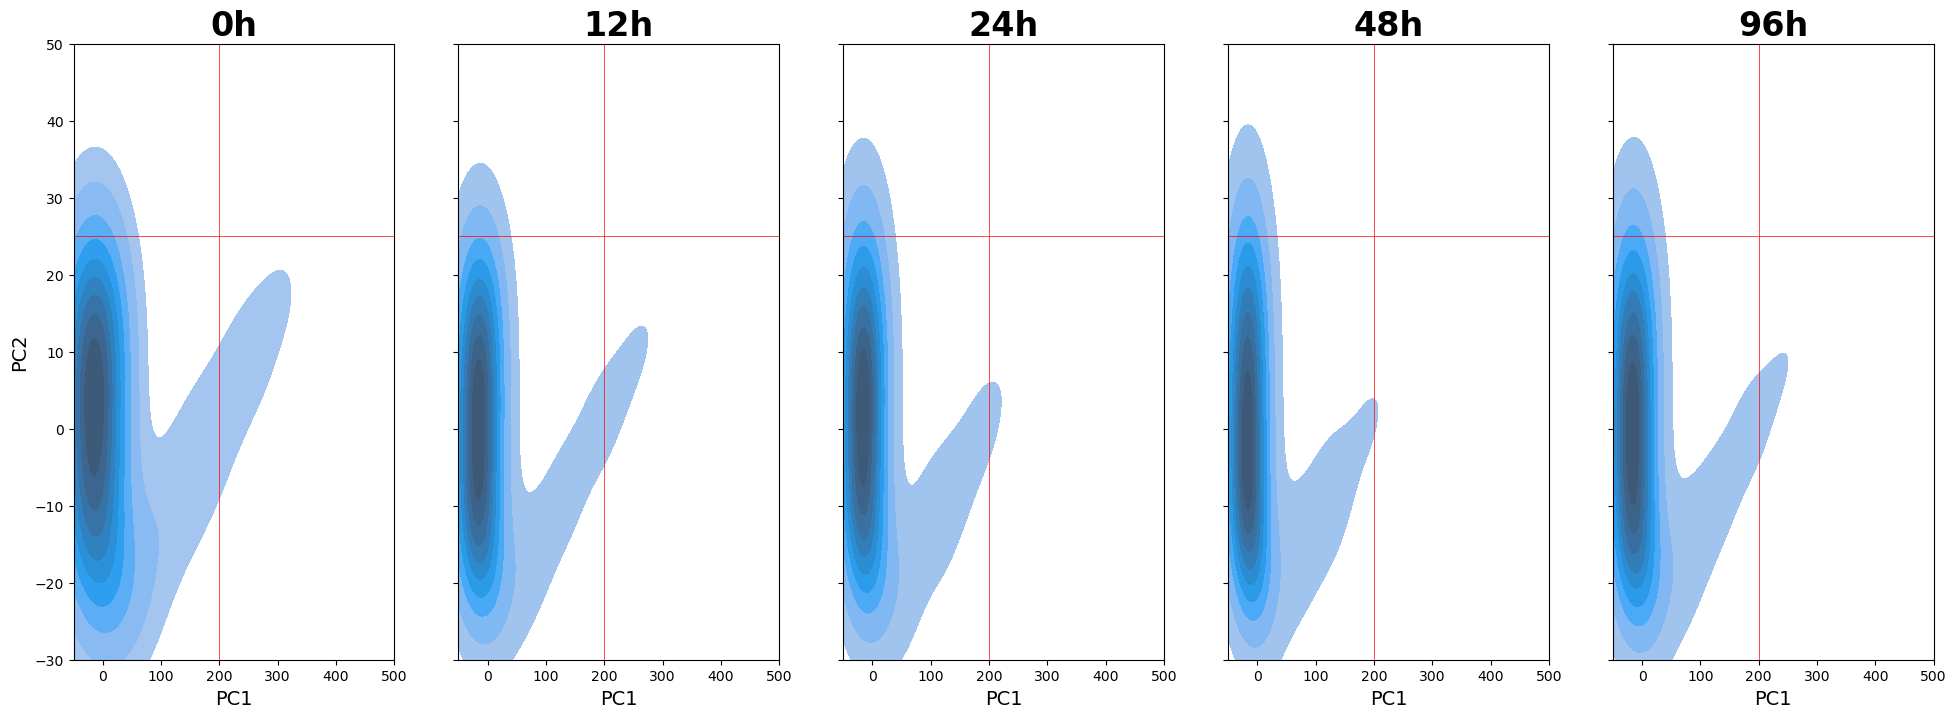

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(24, 8), sharex=True, sharey=True)    

for ax, timepoint in zip(axes.flatten(), timepoints):

    # Subset embedding by timepoint
    indices1 = df.loc[df['timepoint'] == timepoint].index
    X_emb1 = X_emb[indices1]
              
    # KDE plots
    data = pd.DataFrame(X_emb1, columns=['x','y'])
    g = sns.kdeplot(data=data, x='x', y='y', bw_adjust=2, levels=10, thresh=0.05, alpha=alpha_kde, fill=True, ax=ax)

    ax.set_title(timepoint, fontsize=24, fontweight='bold')
    ax.set_xlabel(xlabl, fontsize=14); ax.set_ylabel(ylabl, fontsize=14)
    ax.set_xlim(xlim_left, xlim_right); ax.set_ylim(ylim_down, ylim_up)
    ax.axhline(y = hline_y, color = 'red', linestyle = '-', linewidth = 0.5)
    ax.axvline(x = vline_x, color = 'red', linestyle = '-', linewidth = 0.5)

### Scatter plots

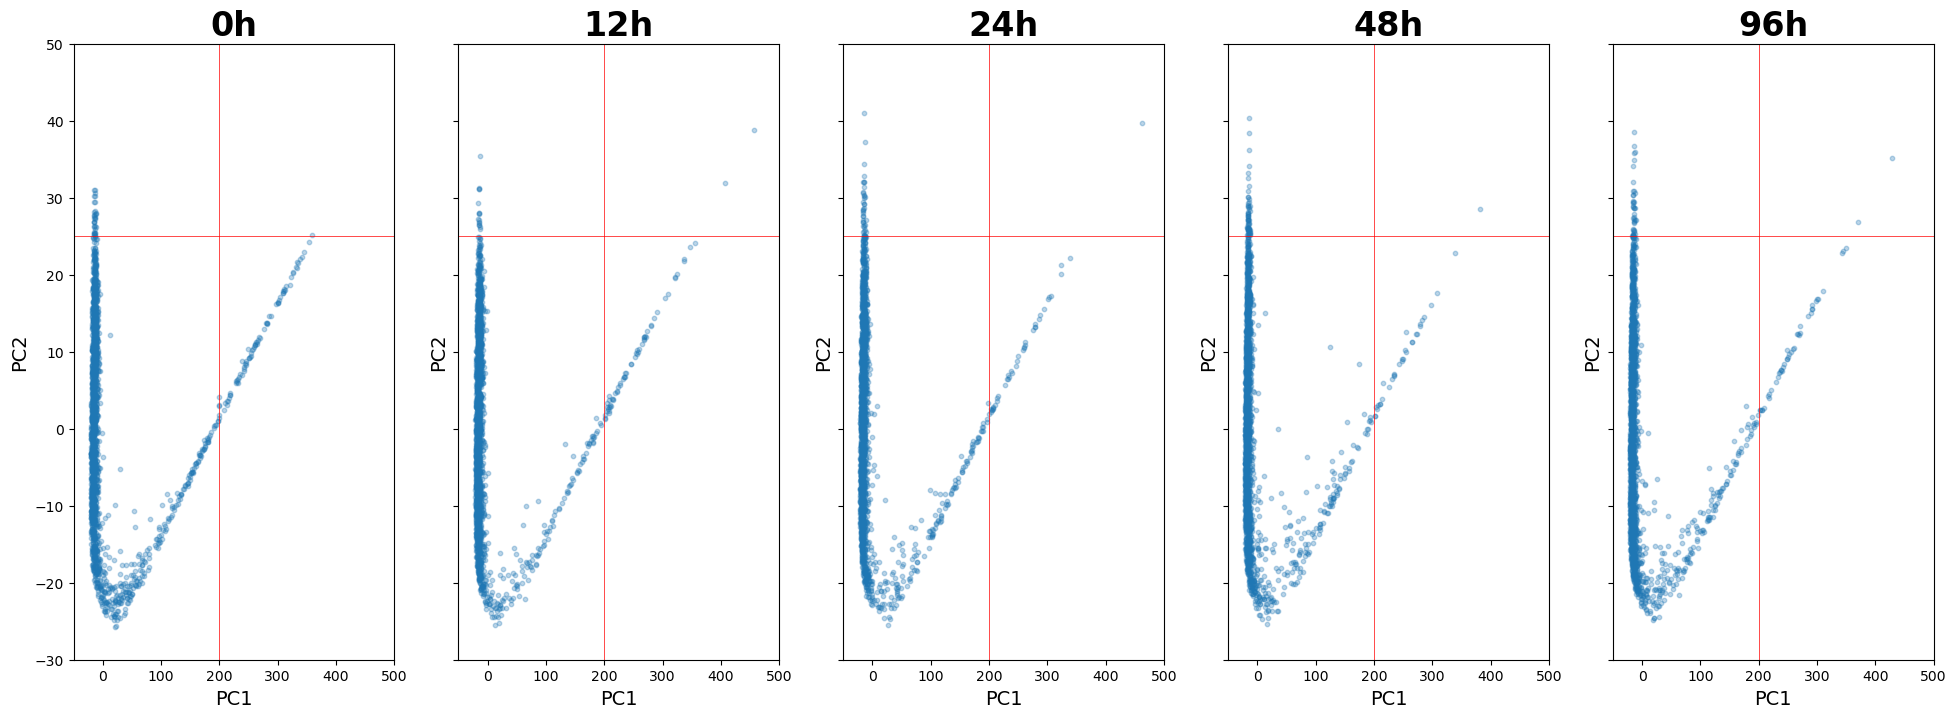

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(24, 8), sharex=True, sharey=True)     

for ax, timepoint in zip(axes.flatten(), timepoints):

    # Subset embedding by timepoint (use subset)  
    indices1 = dfSubset.loc[dfSubset['timepoint'] == timepoint].index
    X_emb1 = X_emb[indices1]
    
    # Scatter plots        
    ax.scatter(X_emb1[:, 0], X_emb1[:, 1], cmap='Spectral', s=s, alpha=alpha_scatter)

    ax.set_title(timepoint, fontsize=24, fontweight='bold')
    ax.set_xlabel(xlabl, fontsize=14); ax.set_ylabel(ylabl, fontsize=14)
    ax.set_xlim(xlim_left, xlim_right); ax.set_ylim(ylim_down, ylim_up)
    ax.axhline(y = hline_y, color = 'red', linestyle = '-', linewidth = 0.5)
    ax.axvline(x = vline_x, color = 'red', linestyle = '-', linewidth = 0.5)

## DAPI/EdU/PCNA
- KDE plots
- Scatter plots

In [9]:
# Load DAPI/EdU embeddings and center
embeddings_arr = np.load('embeddings/embeddings_BYOL_u2os_3channel_all.npy', allow_pickle=True)
scaler = StandardScaler(with_mean=True, with_std=False)
X_centered = scaler.fit_transform(embeddings_arr)

# Run PCA
pca = PCA(n_components=2, random_state=42)
X_emb = pca.fit_transform(X_centered)

# Plotting parameters
xlim_left_k, xlim_right_k, ylim_down_k, ylim_up_k = -600, 900, -50, 100              # KDE
xlim_left_s, xlim_right_s, ylim_down_s, ylim_up_s = -500, 2000, -75, 250              # Scatter
vline_x, hline_y = 250, 20  

### KDE plots

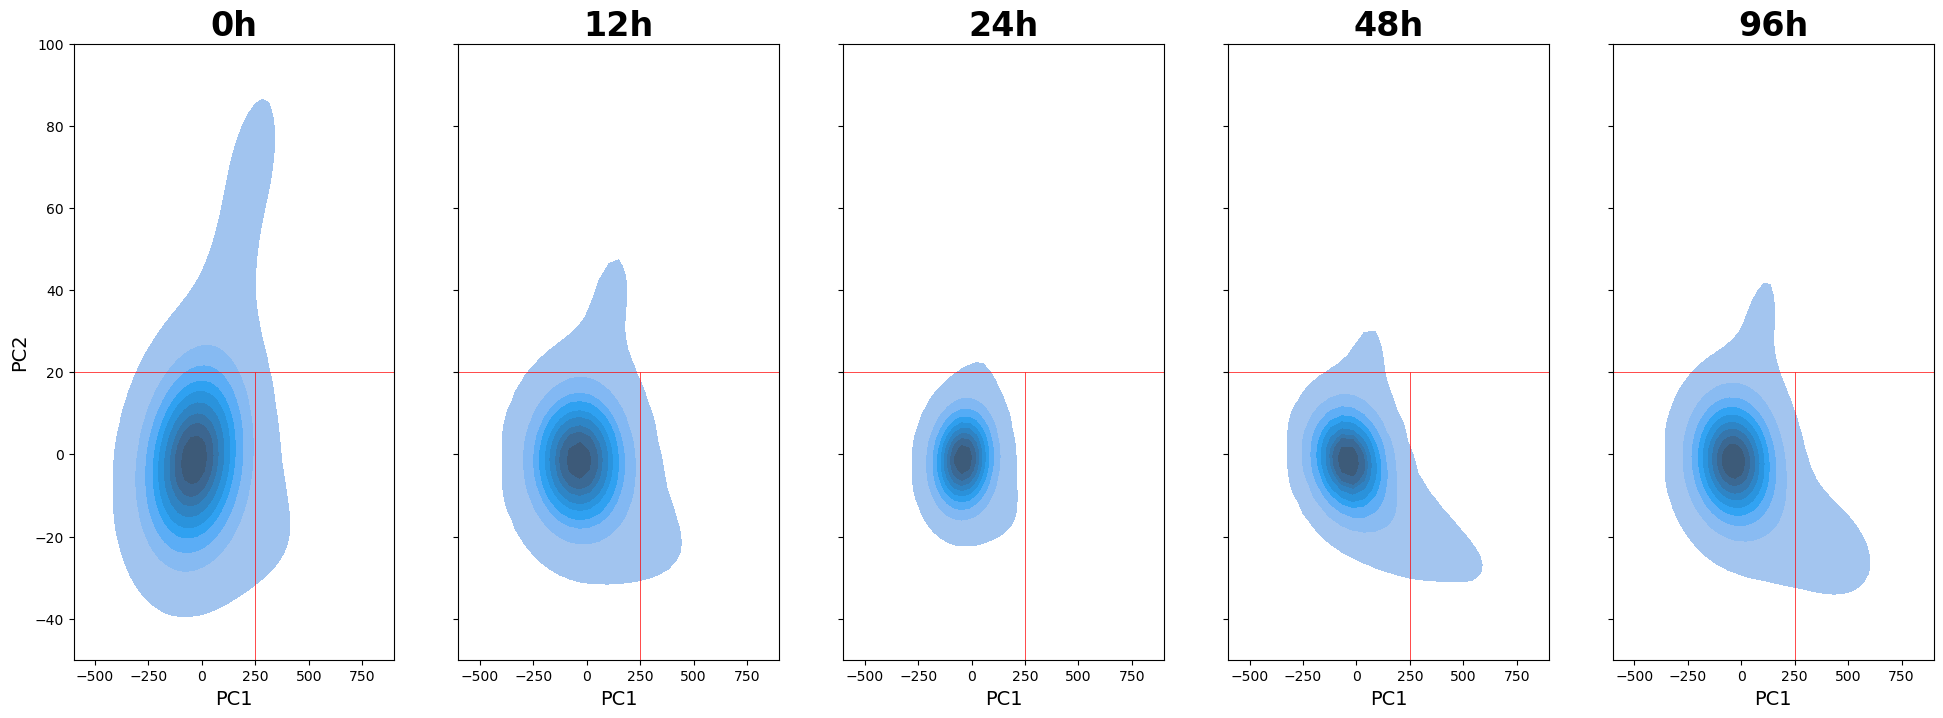

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(24, 8), sharex=True, sharey=True)    

for ax, timepoint in zip(axes.flatten(), timepoints):

    # Subset embedding by timepoint
    indices1 = df.loc[df['timepoint'] == timepoint].index
    X_emb1 = X_emb[indices1]
              
    # KDE plots
    data = pd.DataFrame(X_emb1, columns=['x','y'])
    g = sns.kdeplot(data=data, x='x', y='y', bw_adjust=2, levels=10, thresh=0.05, alpha=alpha_kde, fill=True, ax=ax)

    ax.set_title(timepoint, fontsize=24, fontweight='bold')
    ax.set_xlabel(xlabl, fontsize=14); ax.set_ylabel(ylabl, fontsize=14)
    ax.set_xlim(xlim_left_k, xlim_right_k); ax.set_ylim(ylim_down_k, ylim_up_k)
    ax.axhline(y = hline_y, color = 'red', linestyle = '-', linewidth = 0.5)
    ax.vlines(x = vline_x, ymin = ylim_down_k, ymax = hline_y, color = 'red', linestyle = '-', linewidth = 0.5)

### Scatter plots

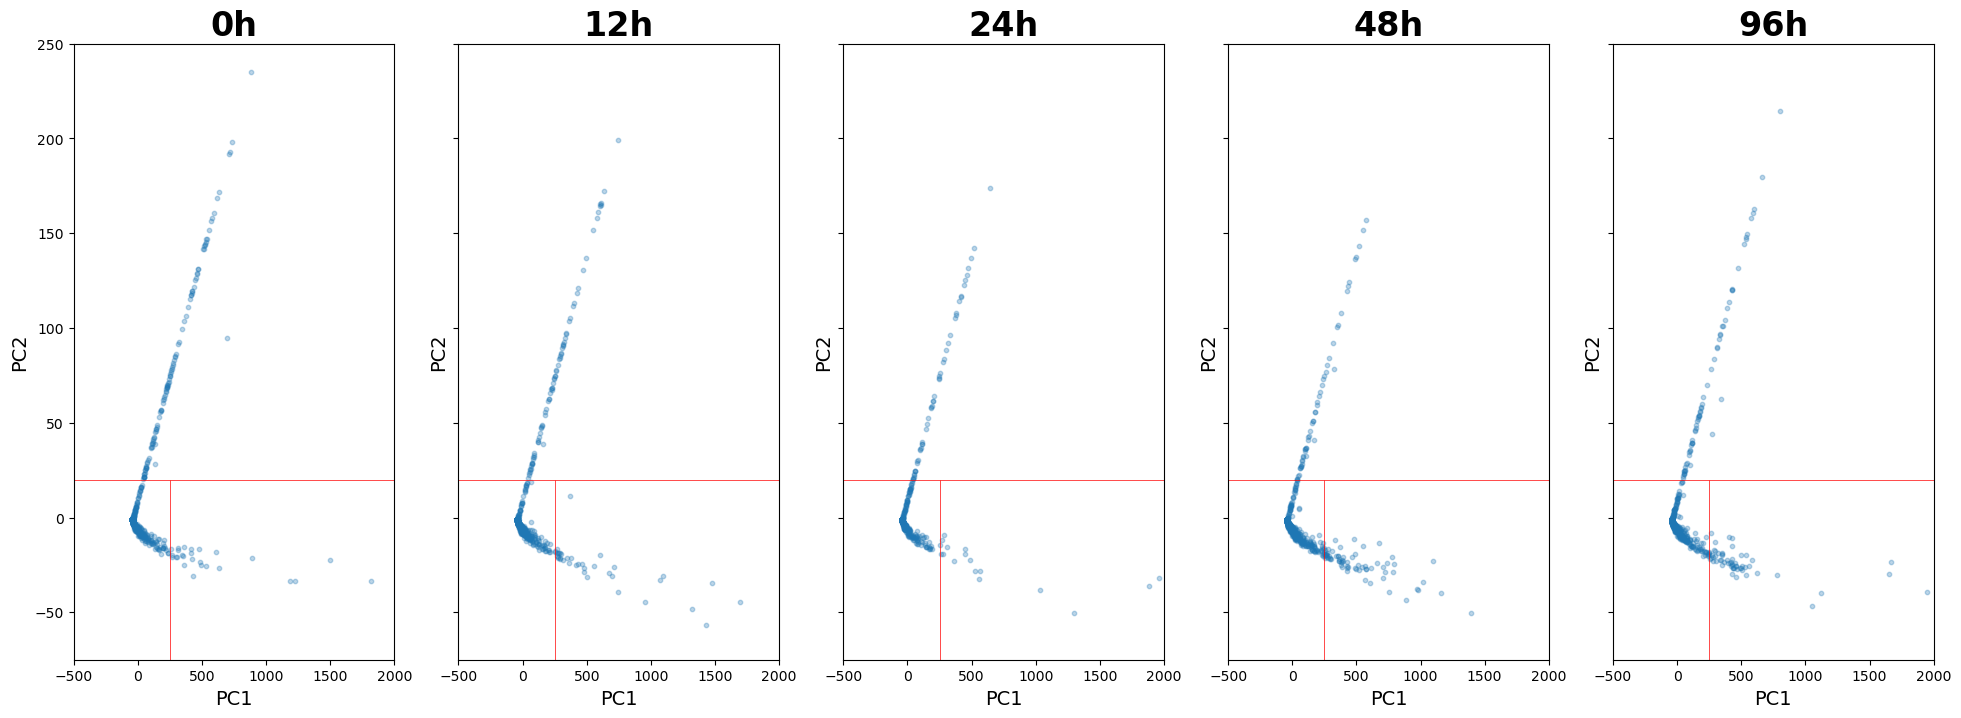

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(24, 8), sharex=True, sharey=True)     

for ax, timepoint in zip(axes.flatten(), timepoints):

    # Subset embedding by timepoint (use subset)  
    indices1 = dfSubset.loc[dfSubset['timepoint'] == timepoint].index
    X_emb1 = X_emb[indices1]
    
    # Scatter plots        
    ax.scatter(X_emb1[:, 0], X_emb1[:, 1], cmap='Spectral', s=s, alpha=alpha_scatter)

    ax.set_title(timepoint, fontsize=24, fontweight='bold')
    ax.set_xlabel(xlabl, fontsize=14); ax.set_ylabel(ylabl, fontsize=14)
    ax.set_xlim(xlim_left_s, xlim_right_s); ax.set_ylim(ylim_down_s, ylim_up_s)
    ax.axhline(y = hline_y, color = 'red', linestyle = '-', linewidth = 0.5)
    ax.vlines(x = vline_x, ymin = ylim_down_s, ymax = hline_y, color = 'red', linestyle = '-', linewidth = 0.5) 